# House Price Prediction Project

##### Problem Statement: 

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: 

- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house? 

##### Business Goal: 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. 

###### Technical Requirements: 

- Data contains 1460 entries each having 81 variables. 
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price. 
- Data contains numerical as well as categorical variable. You need to handle them accordingly. 
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively. 
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

### Import All Need Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as pt

import warnings
warnings.filterwarnings('ignore')

In [55]:
#load train dataset
df=pd.read_csv('house_train.csv')

In [203]:
#load test dataset
df_test=pd.read_csv('house_test.csv')

In [4]:
pd.set_option('display.max_columns',None)
#display the train dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [165]:
#display the test dataset
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [6]:
#check the shape of the both datasets
print(df.shape)
print(df_test.shape)

(1168, 81)
(292, 80)


- 1168 rows and 81 columns in train dataset
- 292 rows and 80 columns in test datatest

In [7]:
#display all variable names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### About columns:-

###### 1. Id

Id of each house in Australia

###### 2. MSSubClass

Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

###### 3. MSZoning

Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

###### 4. LotFrontage

Linear feet of street connected to property

###### 5. LotArea

 Lot size in square feet

###### 6. Street

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	

###### 7. Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

###### 8. LotShape

		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

###### 9. LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

###### 10. Utilities 

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

###### 11. LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

###### 12. LandSlope

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

###### 13. Neighborhood

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

###### 14. Condition1

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

###### 15. Condition2

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

###### 16. BldgType

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

###### 17. HouseStyle

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

###### 18. OverallQual

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

###### 19. OverallCond

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

###### 20. YearBuilt

YearBuilt: Original construction date

###### 21. YearRemodAdd

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

###### 22. RoofStyle

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

###### 23. Roofmatl

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

###### 24. Exterior1st

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

###### 25. Exterior2nd

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

###### 26. MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

###### 27. MasVnrArea

MasVnrArea: Masonry veneer area in square feet

###### 28. ExterQual

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

###### 29. ExterCond

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

###### 30. Foundation

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

###### 31. BsmtQual

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

###### 32. BsmtCond

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

###### 33. BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

###### 34. BsmtFinType1

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

###### 35. BsmtFinSF1

BsmtFinSF1: Type 1 finished square feet

###### 36. BsmtFinType2

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

###### 37. BsmtFinSF2

BsmtFinSF2: Type 2 finished square feet

###### 38. BsmtUnfSF

BsmtUnfSF: Unfinished square feet of basement area

###### 39. TotalBsmtSF

TotalBsmtSF: Total square feet of basement area

###### 40. Heating

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

###### 41. HeatingQC

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

###### 42. CentralAir

CentralAir: Central air conditioning

       N	No
       Y	Yes

###### 43. Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

###### 44. 1stFlrSF

1stFlrSF: First Floor square feet

###### 45. 2ndFlrSF

2ndFlrSF: Second Floor square feet

###### 46. LowQualFinSF

LowQualFinSF: Low quality finished square feet (all floors)

###### 47. GrLivArea

GrLivArea: Above grade (ground) living area square feet

###### 48. BsmtFullBath

BsmtFullBath: Basement full bathrooms

###### 49. BsmtHalfBath

BsmtHalfBath: Basement half bathrooms

###### 50. FullBath

FullBath: Full bathrooms above grade

###### 51. HalfBath

HalfBath: Half baths above grade

###### 52. BedroomAbvGr

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

###### 53. KitchenAbvGr

Kitchen: Kitchens above grade

###### 54. KitchenQual

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

###### 55. TotRmsAbvGrd

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

###### 56. Functional

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

###### 57. Fireplaces

Fireplaces: Number of fireplaces

###### 58. FireplaceQu

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

###### 59. GarageType

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

###### 60. GarageYrBlt

GarageYrBlt: Year garage was built

###### 61. GarageFinish

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

###### 62. GarageCars

GarageCars: Size of garage in car capacity

###### 63. GarageArea

GarageArea: Size of garage in square feet

###### 64. GarageQual

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

###### 65. GarageCond

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

###### 66. PavedDrive

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

###### 67. WoodDeckSF

WoodDeckSF: Wood deck area in square feet

###### 68. OpenPorchSF

OpenPorchSF: Open porch area in square feet

###### 69. EnclosedPorch

EnclosedPorch: Enclosed porch area in square feet

###### 70. 3SsnPorch

3SsnPorch: Three season porch area in square feet

###### 71. ScreenPorch

ScreenPorch: Screen porch area in square feet

###### 72. PoolArea

PoolArea: Pool area in square feet

###### 73. PoolQC

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

###### 74. Fence

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

###### 75. MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

###### 76. MiscVal

MiscVal: $Value of miscellaneous feature

###### 77. MoSold

MoSold: Month Sold (MM)

###### 78. YrSold

YrSold: Year Sold (YYYY)

###### 79. SaleType

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

###### 80. SaleCondition

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

###### 81. SalePrice(Target Variable)

This is target variable that is price of House in Australia

In [8]:
#checking Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []
Empty DataFrame
Columns: [Id

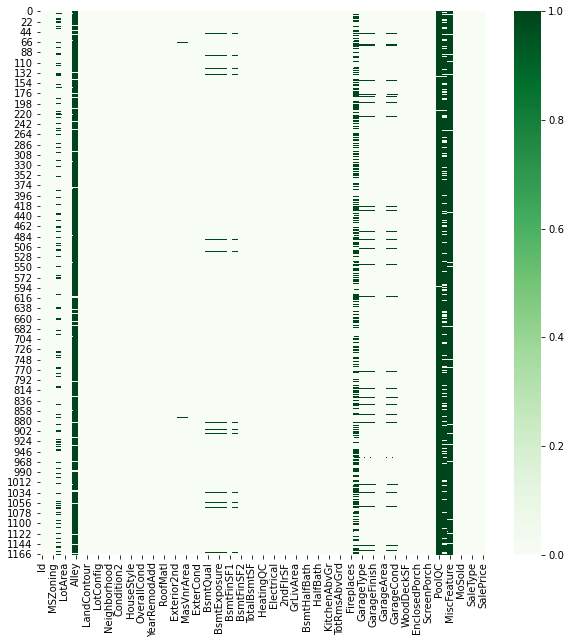

In [9]:
#checking null( values using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap='Greens');

In [10]:
#checking null values and count the null values in all variables
pd.set_option('display.max_rows',None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4))
  #printing percentage of missing values

LotFrontage 0.1832
Alley 0.9341
MasVnrType 0.006
MasVnrArea 0.006
BsmtQual 0.0257
BsmtCond 0.0257
BsmtExposure 0.0265
BsmtFinType1 0.0257
BsmtFinType2 0.0265
FireplaceQu 0.4717
GarageType 0.0548
GarageYrBlt 0.0548
GarageFinish 0.0548
GarageQual 0.0548
GarageCond 0.0548
PoolQC 0.994
Fence 0.7971
MiscFeature 0.9623


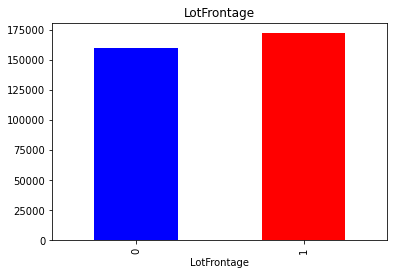

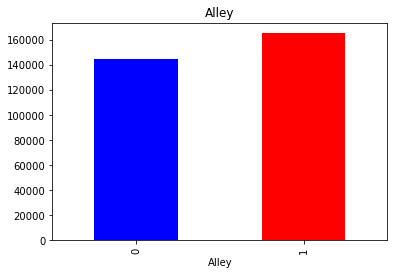

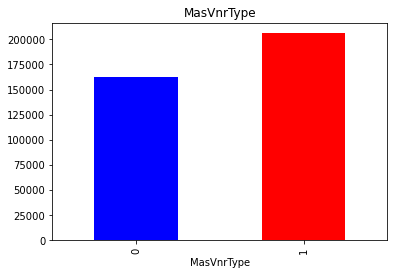

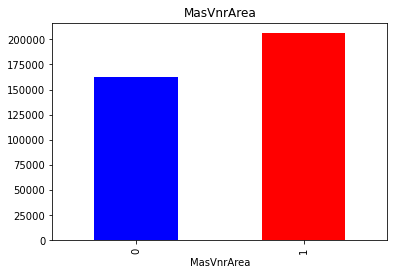

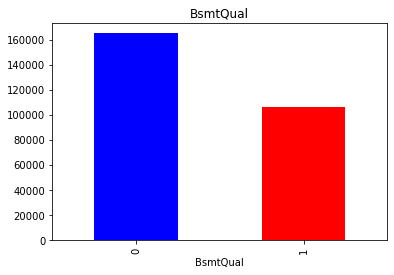

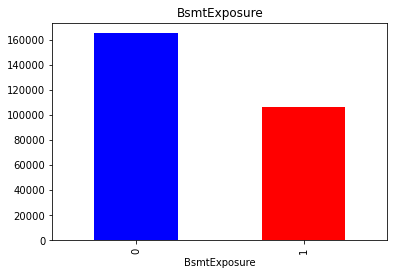

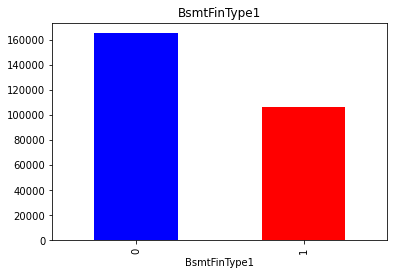

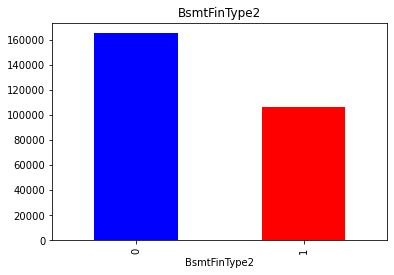

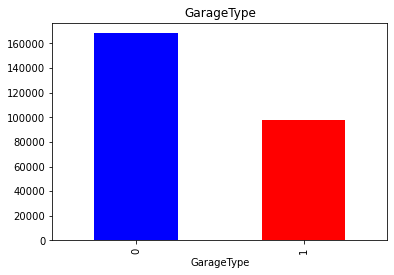

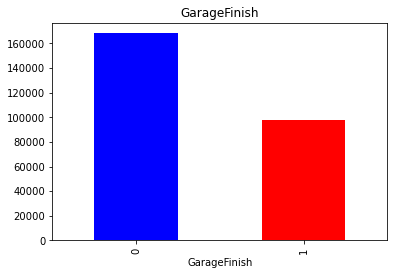

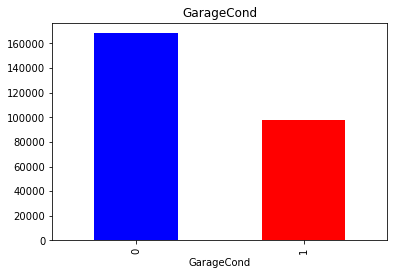

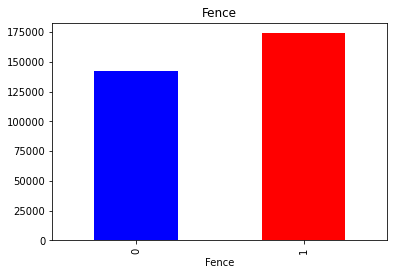

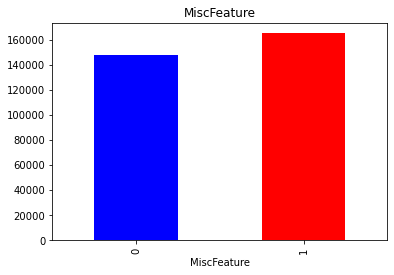

In [12]:
for feature in features_with_na:
    data= df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['blue','red']) #1 for missing values and 0 for observation present
    plt.title(feature)
    plt.show()

In [13]:
#numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='object']
print('Number of numerical variables:',len(numerical_features))
df[numerical_features].head()

Number of numerical variables: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

In [14]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [15]:
#temporal variables
year_feature=[feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
for feature in year_feature:
    print(feature,df[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

Text(0.5, 1.0, 'House price vs year sold')

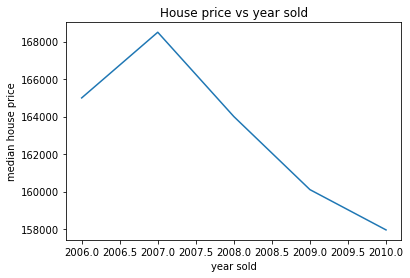

In [17]:
#to check relationship between year of house sold and sale price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("median house price")
plt.title("House price vs year sold")

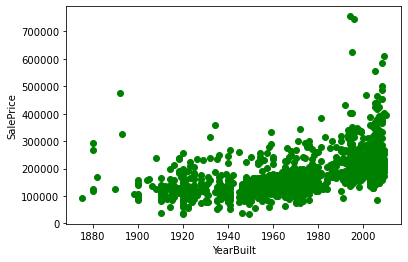

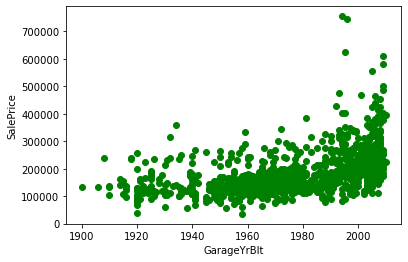

In [18]:
#difference between all year feature with sale price
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        plt.scatter(data[feature],data['SalePrice'],color='green')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [19]:
#discrete features in our data
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print('discrete feature count :',len(discrete_feature))
print(discrete_feature)

discrete feature count : 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [20]:
df[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

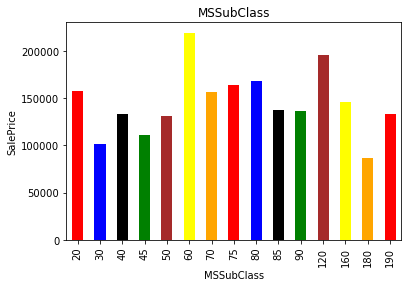

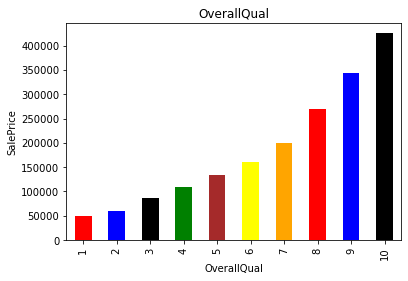

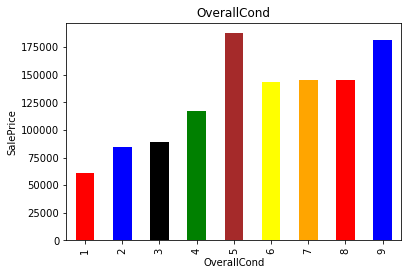

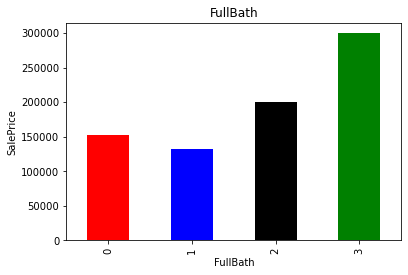

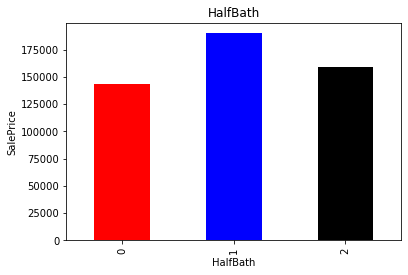

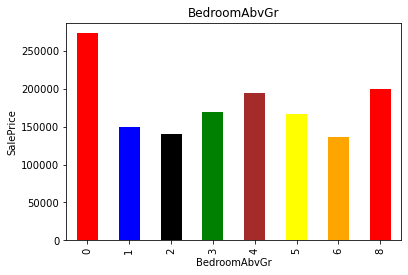

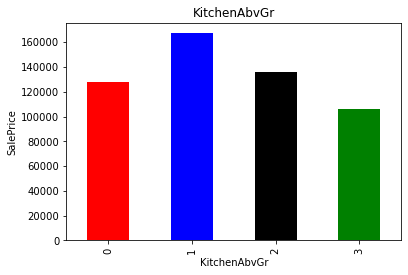

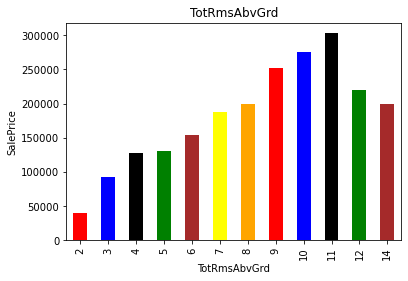

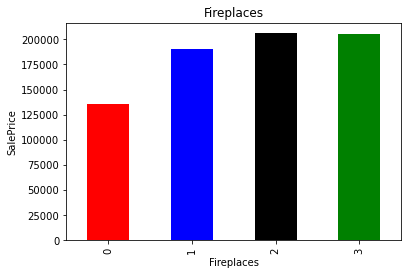

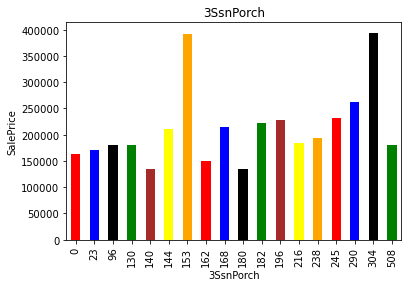

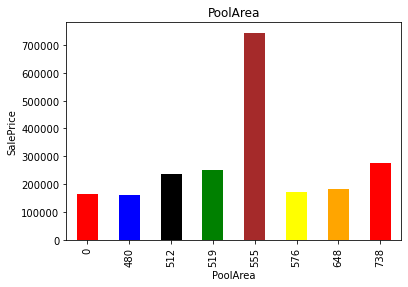

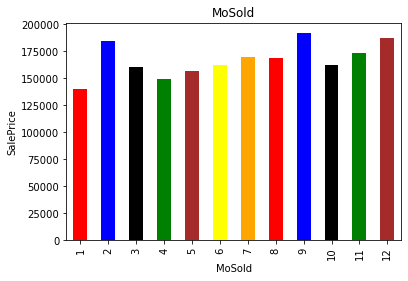

In [21]:
#relationship between discrete variable and sale price
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['red','blue','black','green','brown','yellow','orange'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [22]:
#continuous variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("continuous feature count: ",(len(continuous_feature)))
print(continuous_feature)

continuous feature count:  16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


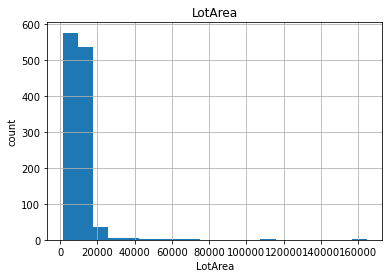

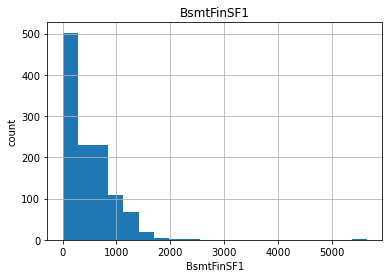

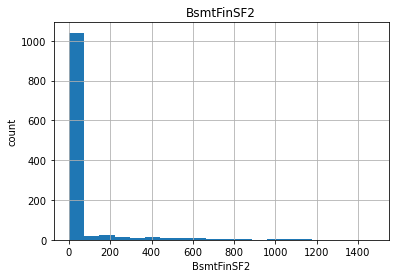

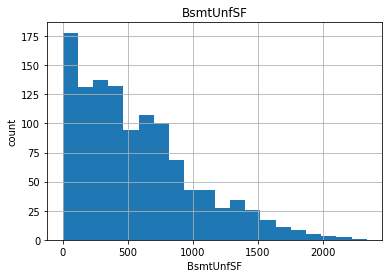

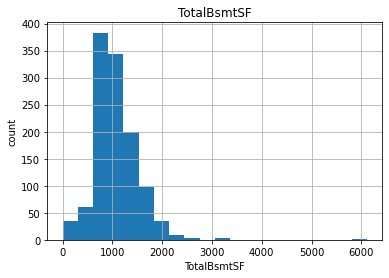

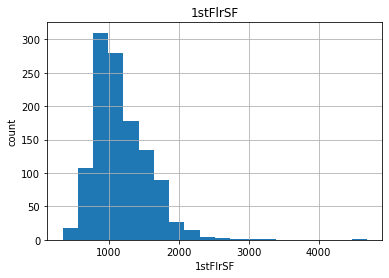

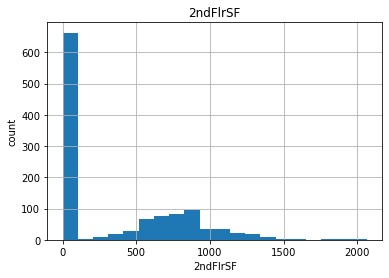

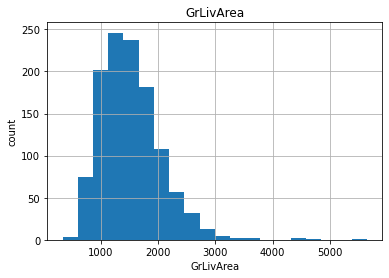

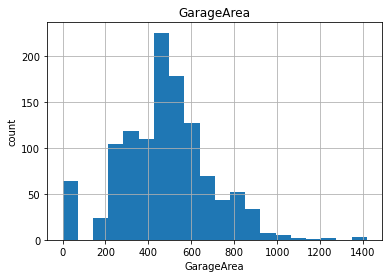

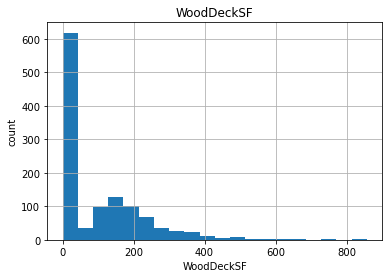

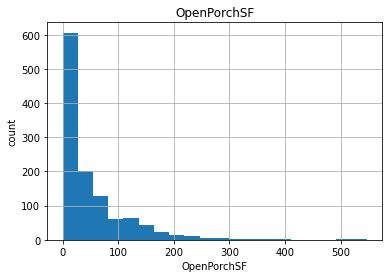

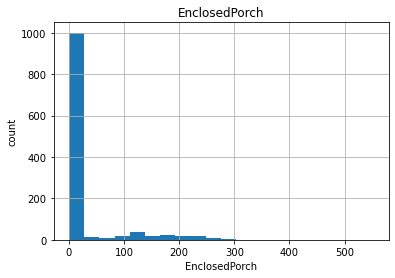

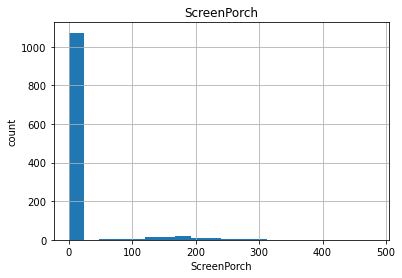

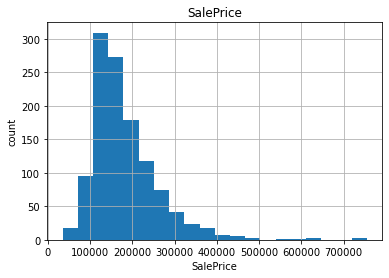

In [23]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

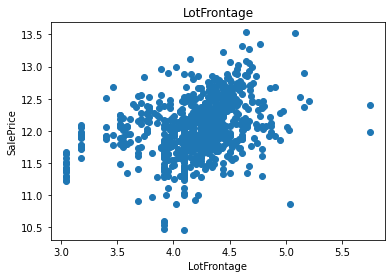

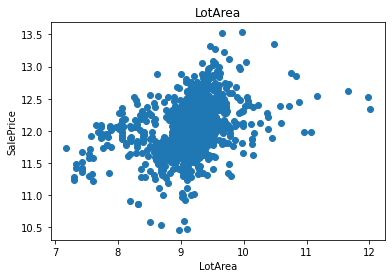

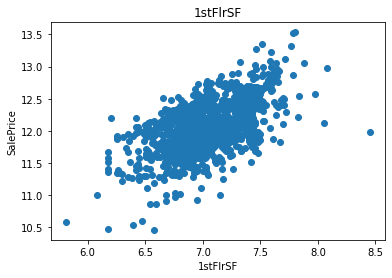

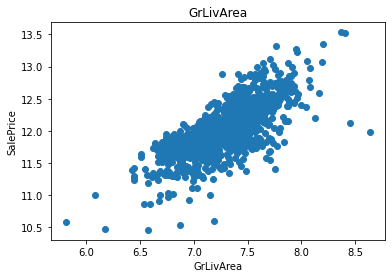

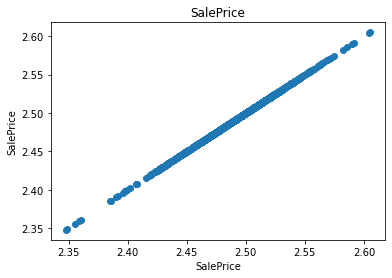

In [24]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

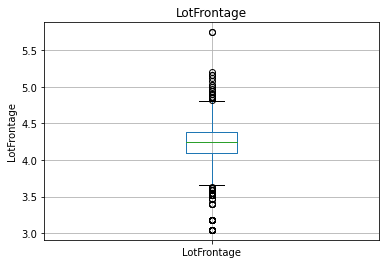

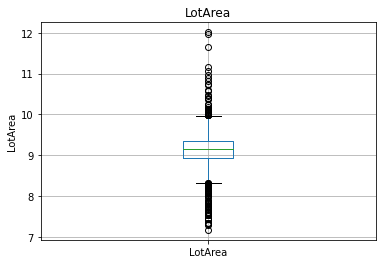

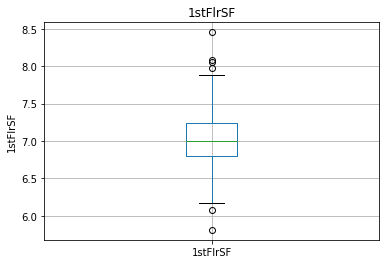

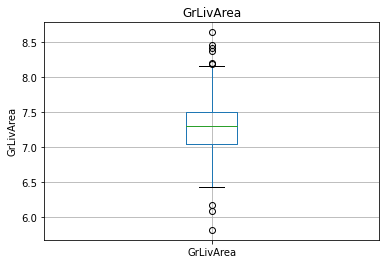

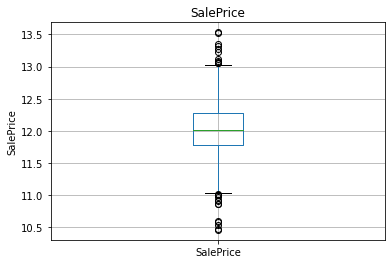

In [25]:
#outliers
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [26]:
#categorical variable
categorical_features=[feature for feature in df.columns if data[feature].dtype=='object']
print('Categorical feature :',len(categorical_features))
categorical_features

Categorical feature : 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     Plywood     Plywood       None        TA        TA     CBlock       Gd   
1     Wd Sdng     Wd Sdng       None        Gd        Gd      PConc       TA   
2     MetalSd     MetalSd       None        Gd        TA      PConc       Gd   
3     Plywood     Plywood    BrkFace        TA        TA     CBlock       Gd   
4     CemntBd     CmentBd      Stone        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          ALQ          Unf    GasA        TA   
1       Gd           Gd          ALQ          Rec    GasA        Ex   
2       TA           Av          GLQ          Unf    GasA        Ex   
3       TA           No          BLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Gd   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          TA     Attchd   
1          Y      SBrkr          Gd        Typ          TA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          TA        Typ          TA     Attchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN    NaN         NaN   
1          Unf         TA         TA          Y    NaN    NaN         NaN   
2          Unf         TA         TA          Y    NaN    NaN         NaN   
3          RFn         TA         TA          Y    NaN  MnPrv         NaN   
4          Fin         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3      COD        Normal  
4       WD        Normal

In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of cate

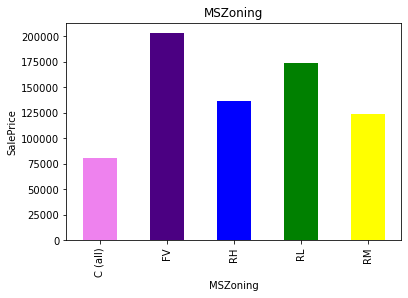

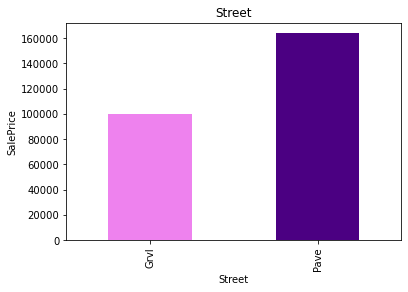

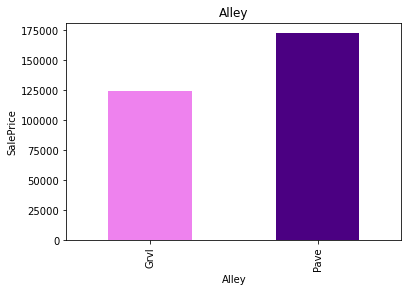

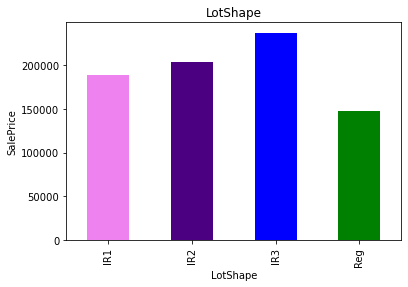

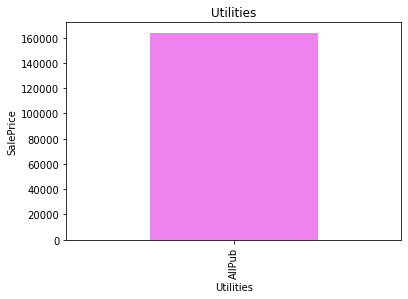

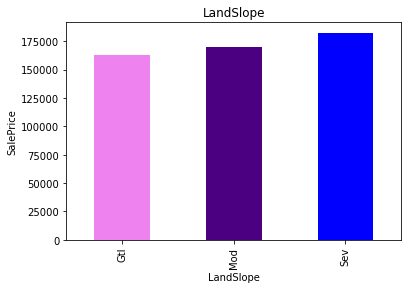

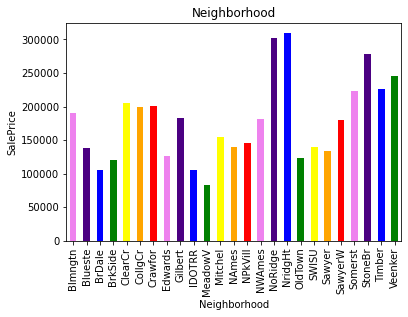

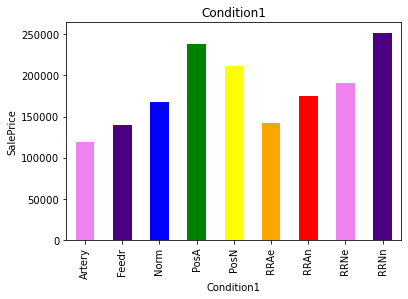

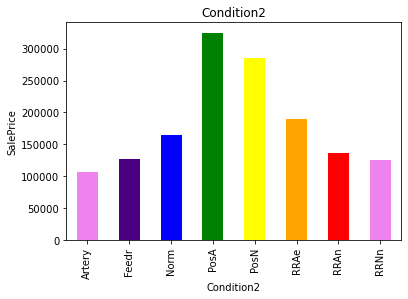

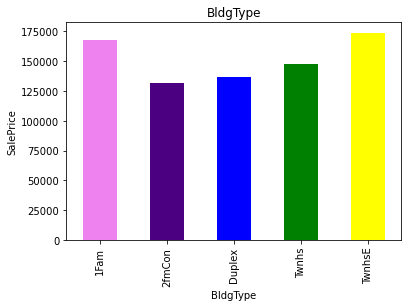

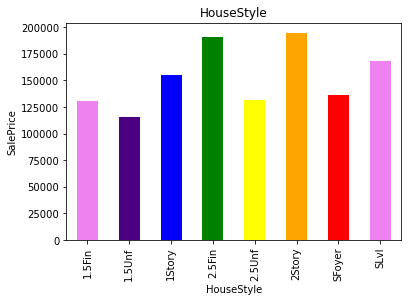

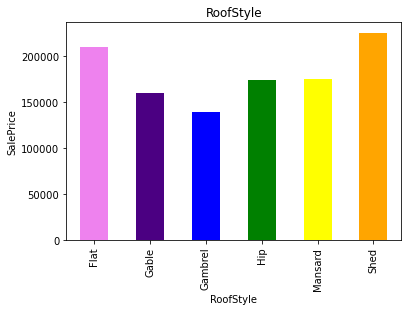

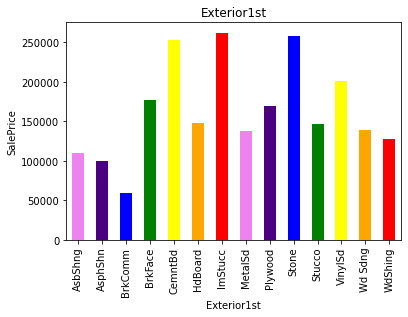

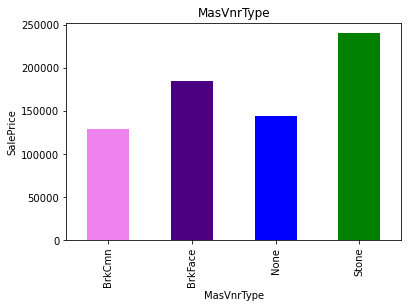

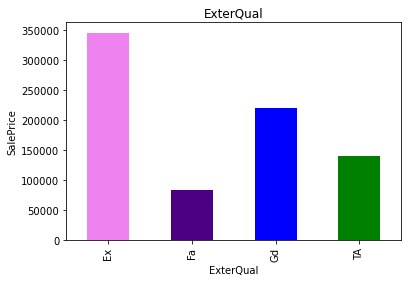

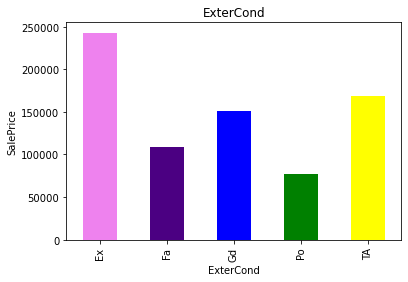

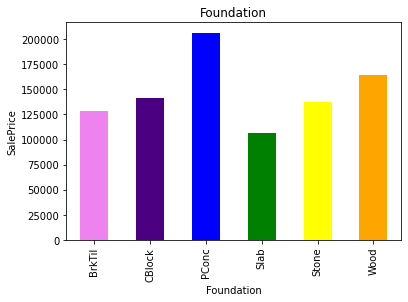

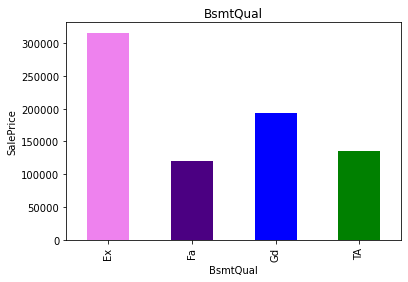

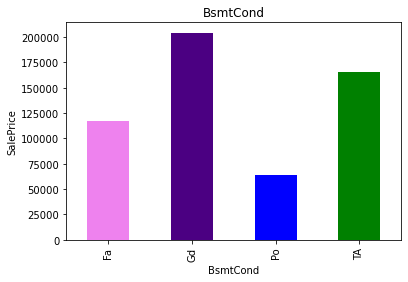

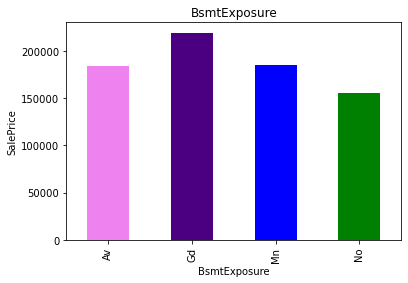

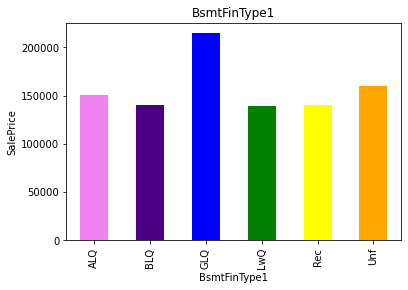

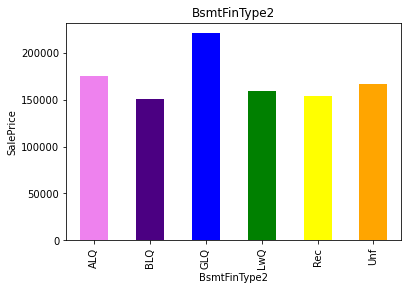

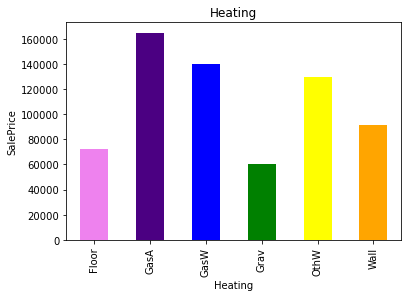

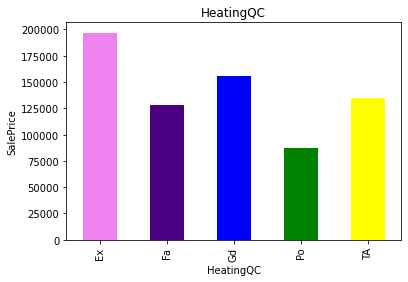

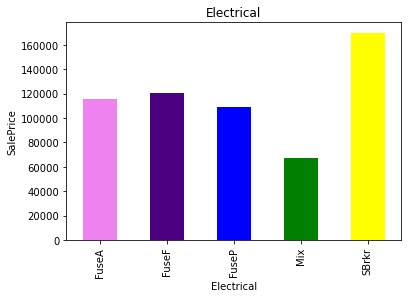

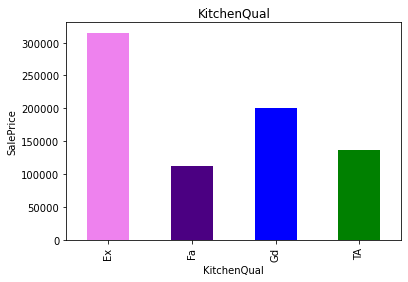

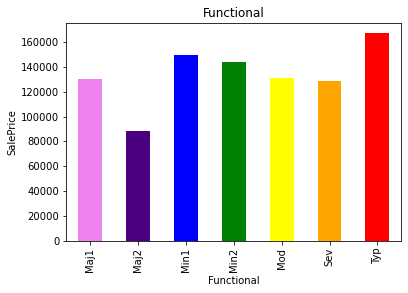

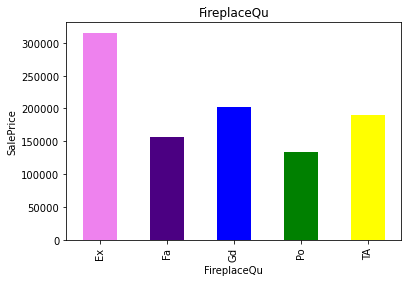

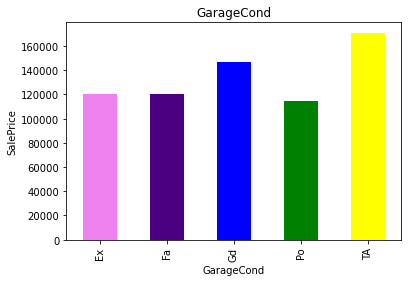

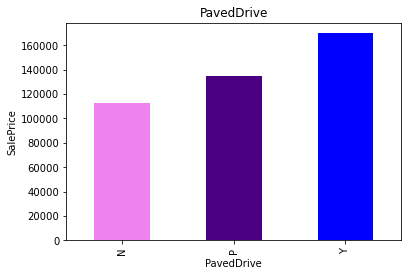

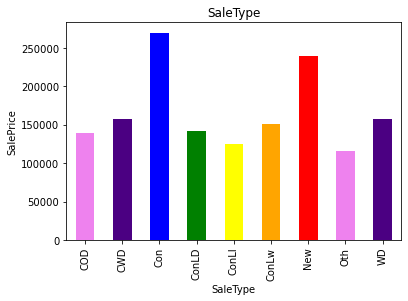

In [29]:
#relationship between categorical variable and dependent feature SalePrice
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['violet','indigo','blue','green','yellow','orange','red'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Apply Label Encoder

In [30]:
df1=df.copy()
X=df1.drop('SalePrice',axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
X=X.apply(LabelEncoder().fit_transform)

In [33]:
df1=X
df1['SalePrice']=df['SalePrice']

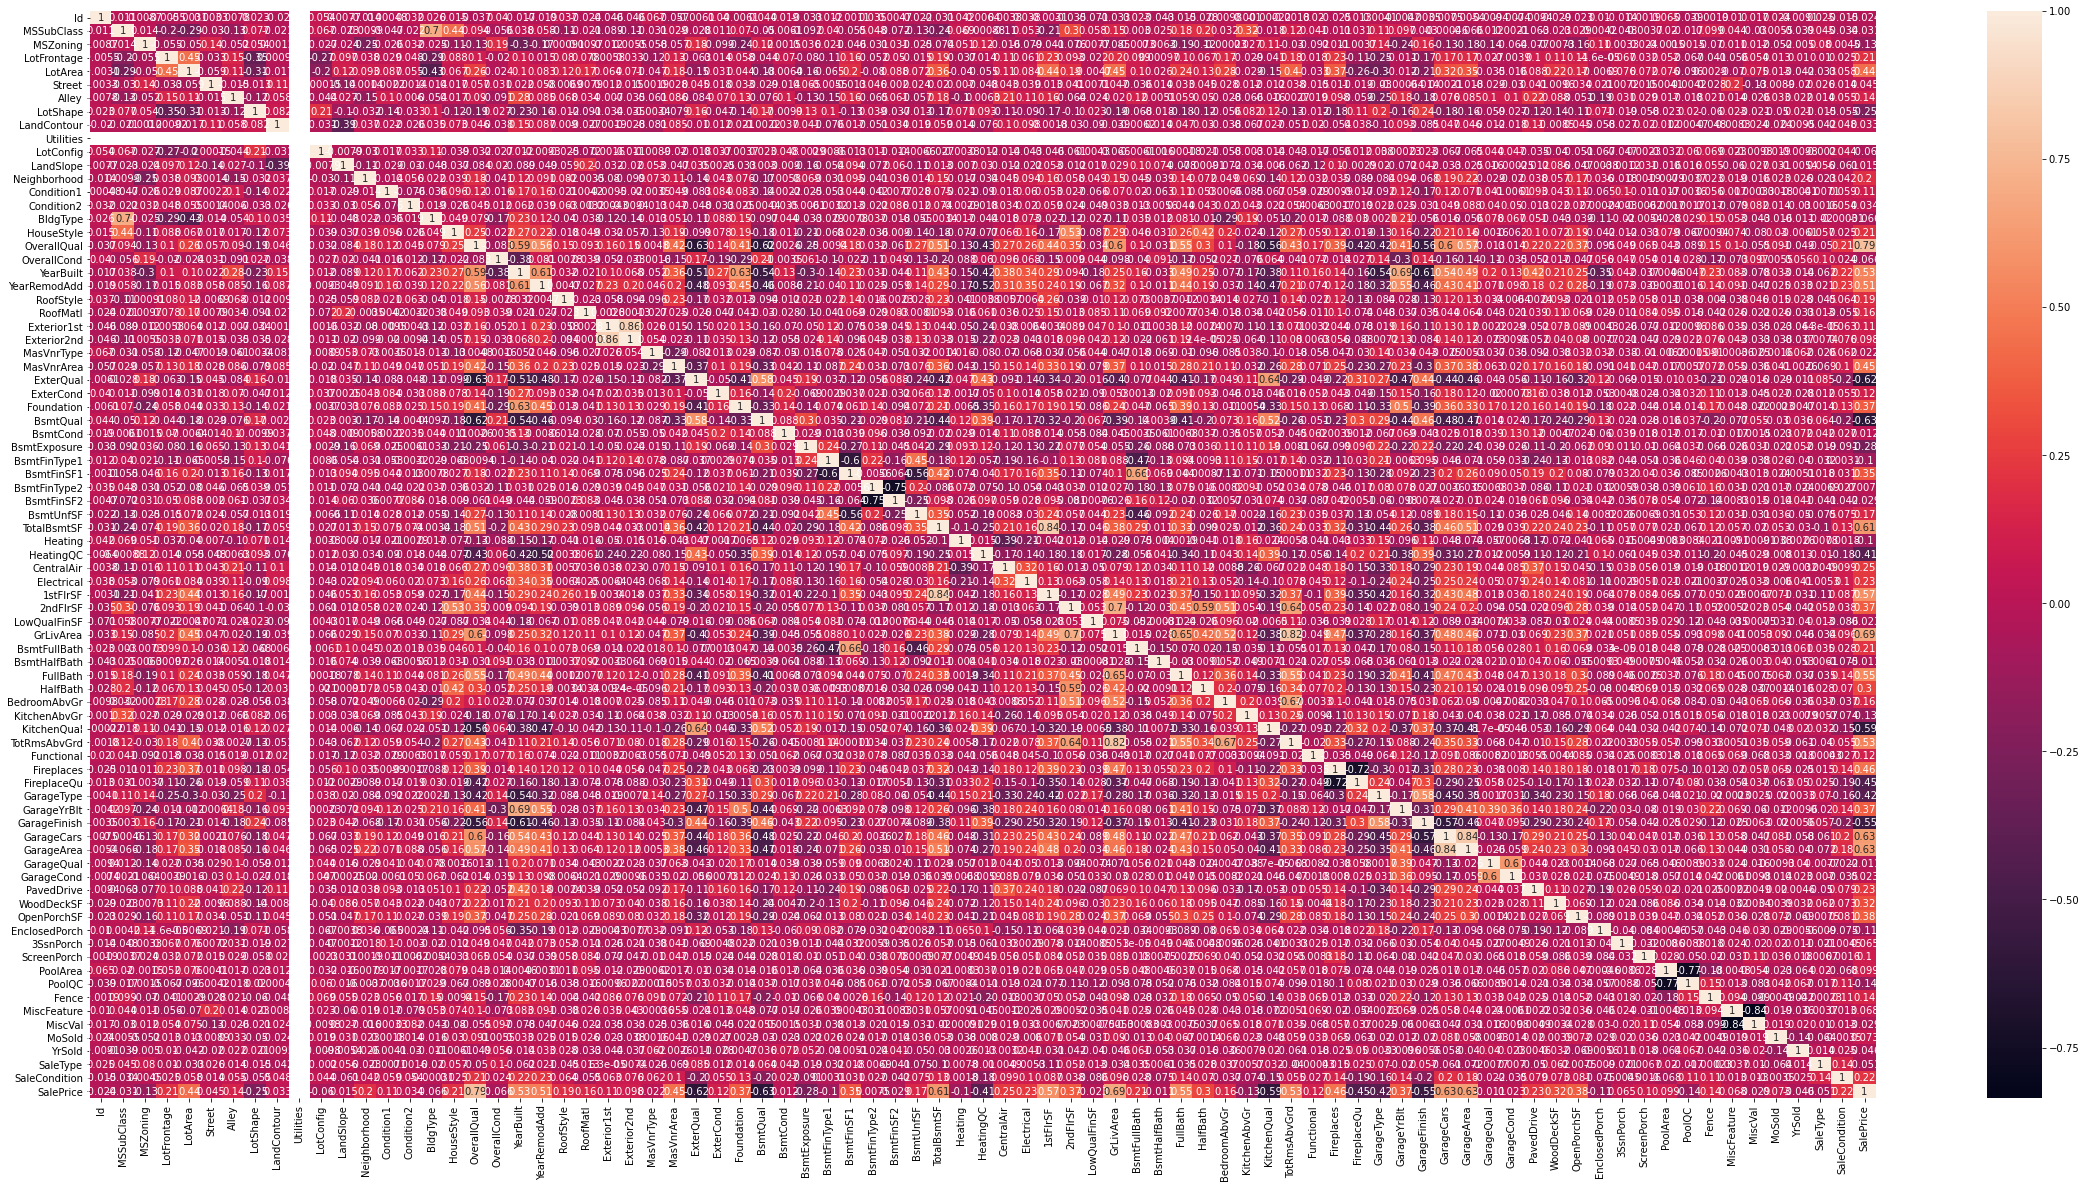

In [34]:
#checking correlation using heatmap
plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [35]:
#checking correlation
df1.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.010555  0.008739    -0.005485 -0.003123   
MSSubClass     0.010555    1.000000  0.013516    -0.198807 -0.289010   
MSZoning       0.008739    0.013516  1.000000    -0.054532 -0.050498   
LotFrontage   -0.005485   -0.198807 -0.054532     1.000000  0.447861   
LotArea       -0.003123   -0.289010 -0.050498     0.447861  1.000000   
Street         0.003303   -0.029520  0.140215    -0.032792 -0.059142   
Alley          0.007752   -0.127555 -0.051864     0.153235  0.114625   
LotShape       0.022605    0.076645  0.053655    -0.350736 -0.305133   
LandContour   -0.020308   -0.021033  0.001175     0.000924 -0.017495   
Utilities           NaN         NaN       NaN          NaN       NaN   
LotConfig      0.054021    0.066929 -0.027246    -0.265732 -0.202196   
LandSlope      0.007659   -0.022919 -0.023952     0.097464  0.117370   
Neighborhood  -0.014157    0.009875 -0.251833     0.037974  0.093021   
Condition1     0.000475   -0.046613 -0.025651     0.028531  0.087367   
Condition2     0.031552   -0.021658  0.031959     0.047600  0.054732   
BldgType       0.026454    0.699825 -0.024776    -0.291658 -0.433648   
HouseStyle     0.014670    0.436668 -0.110991     0.087966  0.067008   
OverallQual   -0.037211    0.093762 -0.134037     0.101198  0.257382   
OverallCond    0.039738   -0.056259  0.189553    -0.019781 -0.023837   
YearBuilt     -0.016642    0.038126 -0.297905     0.102991  0.101251   
YearRemodAdd  -0.018675    0.057686 -0.174586     0.014885  0.082711   
RoofStyle      0.036762   -0.109904  0.000913     0.080211  0.124496   
RoofMatl      -0.023783   -0.021178  0.009719     0.078295  0.168881   
Exterior1st   -0.045894   -0.088935 -0.012037     0.005765  0.063691   
Exterior2nd   -0.046344   -0.111097  0.005548     0.033357  0.070915   
MasVnrType     0.066789   -0.031126 -0.058253    -0.116903 -0.047270   
MasVnrArea    -0.057236    0.029307 -0.057017     0.132544  0.180046   
ExterQual     -0.006073   -0.028107  0.184815    -0.063012 -0.153148   
ExterCond      0.040192    0.010931 -0.099269     0.014450  0.031160   
Foundation    -0.006095    0.069520 -0.244844     0.058436  0.044113   
BsmtQual       0.043654   -0.049774  0.118296    -0.043894 -0.182228   
BsmtCond       0.018559   -0.006092  0.001456     0.070318 -0.006356   
BsmtExposure  -0.032516   -0.091854  0.036035    -0.080247 -0.158822   
BsmtFinType1   0.012014    0.039965  0.020794    -0.107131 -0.065453   
BsmtFinSF1    -0.001054   -0.054886 -0.045912     0.159573  0.195774   
BsmtFinType2   0.035428    0.048404 -0.031203    -0.052095 -0.079536   
BsmtFinSF2     0.004686   -0.072219  0.031038     0.049906  0.088032   
BsmtUnfSF     -0.022016   -0.133540 -0.024519    -0.014607  0.071832   
TotalBsmtSF   -0.031483   -0.242790 -0.074146     0.191212  0.361960   
Heating        0.042073    0.069221  0.051188    -0.037345 -0.039874   
HeatingQC      0.006362   -0.000882  0.119852     0.014187 -0.054686   
CentralAir     0.003763   -0.106946 -0.015887     0.105896  0.105627   
Electrical     0.038078    0.052898 -0.079205     0.060780  0.084062   
1stFlrSF      -0.003071   -0.208870 -0.040968     0.228576  0.436321   
2ndFlrSF      -0.034599    0.303395 -0.076082     0.093184  0.193251   
LowQualFinSF  -0.071200    0.058185  0.007692    -0.021844 -0.004660   
GrLivArea     -0.033126    0.150342 -0.085010     0.202694  0.445132   
BsmtFullBath   0.022994    0.002956 -0.007287     0.098899  0.104622   
BsmtHalfBath  -0.042967    0.024663  0.006345     0.000975  0.026097   
FullBath      -0.015459    0.178100 -0.188837     0.103484  0.236095   
HalfBath      -0.028426    0.197825 -0.121209     0.066610  0.130289   
BedroomAbvGr   0.009781    0.031998 -0.000228     0.165149  0.277605   
KitchenAbvGr   0.001028    0.324594  0.026744    -0.029430 -0.028955   
KitchenQual   -0.000217   -0.018333  0.111689    -0.041490 -0.152446   
TotRmsAbvGrd  -0.001837    0.116792 -0.030274     0.182701  0

In [46]:
#check target variable correlation with other variables
df_target=df1.corr()
df_target['SalePrice'].sort_values(ascending=False)   #Target variable correlation

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.686097
GarageArea       0.634464
GarageCars       0.628329
TotalBsmtSF      0.608936
1stFlrSF         0.574545
FullBath         0.554988
TotRmsAbvGrd     0.529474
YearBuilt        0.526954
YearRemodAdd     0.507831
Fireplaces       0.459611
MasVnrArea       0.448804
LotArea          0.440001
OpenPorchSF      0.379193
2ndFlrSF         0.374566
Foundation       0.374169
GarageYrBlt      0.369540
BsmtFinSF1       0.348158
WoodDeckSF       0.316735
HalfBath         0.295592
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtFullBath     0.212924
LotFrontage      0.206279
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
BsmtUnfSF        0.167070
RoofMatl         0.159865
BedroomAbvGr     0.158980
Fence            0.143922
Alley            0.136664
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1  

In [36]:
#describe the data
df1.describe().T

count           mean           std      min        25%  \
Id             1168.0     583.500000    337.316864      0.0     291.75   
MSSubClass     1168.0       4.166096      4.139986      0.0       0.00   
MSZoning       1168.0       3.013699      0.633120      0.0       3.00   
LotFrontage    1168.0      52.454623     31.378301      0.0      30.00   
LotArea        1168.0     414.643836    249.993254      0.0     197.75   
Street         1168.0       0.996575      0.058445      0.0       1.00   
Alley          1168.0       1.898973      0.401453      0.0       2.00   
LotShape       1168.0       1.938356      1.412262      0.0       0.00   
LandContour    1168.0       2.773973      0.710027      0.0       3.00   
Utilities      1168.0       0.000000      0.000000      0.0       0.00   
LotConfig      1168.0       3.004281      1.642667      0.0       2.00   
LandSlope      1168.0       0.064212      0.284088      0.0       0.00   
Neighborhood   1168.0      12.145548      6.010364      0.0       7.00   
Condition1     1168.0       2.032534      0.871703      0.0       2.00   
Condition2     1168.0       2.005993      0.250035      0.0       2.00   
BldgType       1168.0       0.476027      1.180870      0.0       0.00   
HouseStyle     1168.0       3.043664      1.898625      0.0       2.00   
OverallQual    1168.0       5.104452      1.390153      0.0       4.00   
OverallCond    1168.0       4.595890      1.124343      0.0       4.00   
YearBuilt      1168.0      70.619007     28.853699      0.0      53.00   
YearRemodAdd   1168.0      34.758562     20.785185      0.0      16.00   
RoofStyle      1168.0       1.402397      0.832539      0.0       1.00   
RoofMatl       1168.0       1.086473      0.642848      0.0       1.00   
Exterior1st    1168.0       8.659247      3.097443      0.0       7.00   
Exterior2nd    1168.0       9.363014      3.462380      0.0       7.00   
MasVnrType     1168.0       1.770548      0.634962      0.0       1.00   
MasVnrArea     1168.0      52.945205     80.735206      0.0       0.00   
ExterQual      1168.0       2.530822      0.699425      0.0       2.00   
ExterCond      1168.0       3.725171      0.744463      0.0       4.00   
Foundation     1168.0       1.395548      0.709379      0.0       1.00   
BsmtQual       1168.0       2.308219      0.893201      0.0       2.00   
BsmtCond       1168.0       2.827911      0.700355      0.0       3.00   
BsmtExposure   1168.0       2.299658      1.172054      0.0       2.00   
BsmtFinType1   1168.0       2.824486      1.875065      0.0       1.00   
BsmtFinSF1     1168.0     175.529966    175.856891      0.0       0.00   
BsmtFinType2   1168.0       4.739726      0.947136      0.0       5.00   
BsmtFinSF2     1168.0       6.757705     22.059754      0.0       0.00   
BsmtUnfSF      1168.0     285.619863    200.425424      0.0     110.00   
TotalBsmtSF    1168.0     268.768836    174.858561      0.0     125.00   
Heating        1168.0       1.035959      0.302078      0.0       1.00   
HeatingQC      1168.0       1.569349      1.749129      0.0       0.00   
CentralAir     1168.0       0.933219      0.249749      0.0       1.00   
Electrical     1168.0       3.688356      1.042606      0.0       4.00   
1stFlrSF       1168.0     296.392979    185.215617      0.0     136.00   
2ndFlrSF       1168.0      73.203767    103.681502      0.0       0.00   
LowQualFinSF   1168.0       0.190068      1.576337      0.0       0.00   
GrLivArea      1168.0     335.596747    207.429163      0.0     159.75   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.883562      0.812375      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
KitchenQual    1168.

In [56]:
#handling the categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='object']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [57]:
# Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

In [58]:
df=replace_cat_feature(df,features_nan)
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [59]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='object']

# We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.round(df[feature].isnull().mean(),4)))

LotFrontage: 0.1832% missing value
MasVnrArea: 0.006% missing value
GarageYrBlt: 0.0548% missing value


In [60]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [61]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [62]:
#drop the Utilities variable
df.drop('Utilities',axis=1,inplace=True) #have only one unique value

### Apply Label Encoder

In [63]:
x=df.drop('SalePrice',axis=1)
x=x.apply(LabelEncoder().fit_transform)
df1=x
df1['SalePrice']=df['SalePrice']
df=df1

In [64]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   94          11         3           40       80       1      1         0   
1  720           0         3           65      808       1      1         0   
2  642           5         3           62      449       1      1         0   
3   79           0         3           75      632       1      1         0   
4  341           0         3           40      821       1      1         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0            13           2           2   
1            3          4          1            12           2           2   
2            3          1          0            15           2           2   
3            3          4          0            14           2           2   
4            3          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            5            4         75            26   
1         0           2            7            5         69            20   
2         0           5            6            4         95            47   
3         0           2            5            5         76            27   
4         0           2            5            6         76            50   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1            8            9           3           0   
1          0         5           12           13           3           0   
2          1         1            7            7           3           0   
3          3         1            8            9           1         236   
4          1         1            4            4           4          73   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         4             4   
1          2          2           2         4         1             1   
2          2          4           2         2         4             0   
3          3          4           1         2         4             4   
4          2          4           1         2         4             4   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0          25             6           0        500          286   
1             0         112             5         107        527          624   
2             2         382             6           0        135          312   
3             1         312             6           0        558          590   
4             0         489             6           0        192          537   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4       180         0   
1        1          0           1           4       654         0   
2        1          0           1           4       295       215   
3        1          0           1           4       617         0   
4        1          2           1           4       541         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0         70             0             0         2         0   
1             0        646             1             0         2         0   
2             0        585             1             0         2         1   
3             0        520             0             0         2         0   
4             0        399             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             3           6   
1             4             1            2             6           6   
2             3             1            3             6           6   
3             3             1       

### Checking Skewness

In [66]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']
x.skew().sort_values(ascending=False)

PoolArea          16.104199
MasVnrAreanan     12.817372
Condition2        11.514458
Heating           10.103609
LowQualFinSF       9.415784
3SsnPorch          9.027896
RoofMatl           7.577352
MiscVal            7.173020
MiscFeature        4.958391
LandSlope          4.812568
KitchenAbvGr       4.365259
BsmtHalfBath       4.264403
ScreenPorch        4.102578
GarageYrBltnan     3.917573
BsmtFinSF2         3.504848
Condition1         3.008289
EnclosedPorch      2.970356
BldgType           2.318657
LotFrontagenan     1.639868
RoofStyle          1.498560
MasVnrArea         1.355502
OpenPorchSF        1.310668
WoodDeckSF         1.160154
2ndFlrSF           1.147278
Fireplaces         0.671966
MSSubClass         0.657253
HalfBath           0.656492
BsmtFullBath       0.627106
GarageType         0.625609
TotRmsAbvGrd       0.620024
OverallCond        0.580714
BsmtFinSF1         0.539784
LotFrontage        0.498444
HeatingQC          0.449933
TotalBsmtSF        0.368099
GarageArea         0

In [67]:
#removing skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [68]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer()
pipe=Pipeline(steps=[('p',power),('s',scaler)])

In [69]:
data=pipe.fit_transform(x)

In [70]:
x=pd.DataFrame(data,columns=x.columns)

In [86]:
# drop Id Variable bcz all houses as unique id
x.drop('Id',axis=1,inplace=True)

In [71]:
#some variables are highly negative correlation with target variables so drop that variables
x.drop('HeatingQC',axis=1,inplace=True)
x.drop('GarageType',axis=1,inplace=True)
x.drop('GarageFinish',axis=1,inplace=True)
x.drop('KitchenQual',axis=1,inplace=True)
x.drop('BsmtQual',axis=1,inplace=True)

In [87]:
#shape of x after drop some variable
x.shape

(1168, 76)

In [88]:
#shape the target variable
y.shape

(1168,)

## Model Selection

In [89]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#model selection
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [91]:
models_list=[lr,lasso,ridge,dtr,knr,rfr,gbr,abr]

### LinearRegression

In [92]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8580827434631967 maxrn: 77


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
lr.fit(x_train,y_train)
score=lr.score(x_train,y_train)
pred=lr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8580827434631967
mean_absolute_error: 29278.51066032615
mean_squared_error: 2912311307.250931
r2_score: 0.48535871167400013


### Lasso Regressor

In [94]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8580805424423575 maxrn: 77


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
lasso.fit(x_train,y_train)
score=lasso.score(x_train,y_train)
pred=lasso.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8580805424423575
mean_absolute_error: 29240.758859430665
mean_squared_error: 2907369757.886772
r2_score: 0.48539432890873135


### Ridge Regressor

In [96]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8548134130367737 maxrn: 77


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
ridge.fit(x_train,y_train)
score=ridge.score(x_train,y_train)
pred=ridge.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8548134130367737
mean_absolute_error: 27856.355272611236
mean_squared_error: 2841261458.306603
r2_score: 0.4723279167880059


### DecisionTreeRegressor

In [98]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 1.0 maxrn: 1


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
dtr.fit(x_train,y_train)
score=dtr.score(x_train,y_train)
pred=dtr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 1.0
mean_absolute_error: 26574.41452991453
mean_squared_error: 1854426360.3205128
r2_score: 0.7192240577478837


### KNeighborsRegressor

In [100]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8198694866209895 maxrn: 20


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=20)
knr.fit(x_train,y_train)
score=knr.score(x_train,y_train)
pred=knr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8198694866209895
mean_absolute_error: 30649.32905982906
mean_squared_error: 3826185602.27265
r2_score: -0.07482254316678771


### RandomForestRegressor

In [102]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.9837589483681044 maxrn: 16


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=16)
rfr.fit(x_train,y_train)
score=rfr.score(x_train,y_train)
pred=rfr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.983547104290459
mean_absolute_error: 23248.027777777777
mean_squared_error: 2666267704.8676224
r2_score: 0.6064631523488916


### GradientBoostingRegressor

In [104]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.974906681223331 maxrn: 92


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=92)
gbr.fit(x_train,y_train)
score=gbr.score(x_train,y_train)
pred=gbr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.974906681223331
mean_absolute_error: 17889.671500432018
mean_squared_error: 736676831.5382053
r2_score: 0.8575452930835058


### AdaBoostRegressor

In [106]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8946491981826274 maxrn: 27


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=27)
gbr.fit(x_train,y_train)
score=gbr.score(x_train,y_train)
pred=gbr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.974529678078367
mean_absolute_error: 18090.86218559111
mean_squared_error: 1094725946.2035348
r2_score: 0.7860308130811435


### Cross Validation

In [110]:
for model in models_list:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())
    print('\n')

LinearRegression()
[0.77493517 0.75867207 0.69255325 0.82290873 0.79598836]
0.7690115164696217


Lasso()
[0.77512185 0.75880422 0.69241124 0.82301799 0.7972555 ]
0.7693221606283862


Ridge()
[0.76517719 0.76631316 0.69358397 0.82710435 0.83390548]
0.7772168296981576


DecisionTreeRegressor()
[0.69434152 0.64427975 0.73265223 0.76819304 0.62861312]
0.6936159317450679


KNeighborsRegressor()
[0.67490992 0.72107719 0.65612121 0.71303389 0.69780227]
0.6925888956311337


RandomForestRegressor()
[0.88131412 0.76090905 0.827144   0.88874752 0.83271196]
0.8381653299777658


GradientBoostingRegressor()
[0.87262921 0.76954207 0.88569761 0.90564499 0.86962341]
0.8606274566754424


AdaBoostRegressor()
[0.83039815 0.77973757 0.81098454 0.84223309 0.7604477 ]
0.8047602085925961




### GradientBoostingRegressor is the best model

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=92)
gbr.fit(x_train,y_train)
score=gbr.score(x_train,y_train)
pred=gbr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.974906681223331
mean_absolute_error: 17938.340370855
mean_squared_error: 737545243.318355
r2_score: 0.8578003817131725


### Hyperparameter Tuning

In [112]:
parameters={'loss':['squared_error','absolute_error','huber','quantile'],'n_estimators':[50,70,100]}

In [113]:
gbr_grid = GridSearchCV(gbr,param_grid=parameters, cv=5)
gbr_grid.fit(x_train,y_train)
print('Best score:', gbr_grid.best_score_)
print('Best score:', gbr_grid.best_params_)
print('Best score:', gbr_grid.best_estimator_)

Best score: 0.8564971097293185
Best score: {'loss': 'squared_error', 'n_estimators': 70}
Best score: GradientBoostingRegressor(n_estimators=70)


### Save the model

In [114]:
import joblib

In [115]:
#save the model
joblib.dump(gbr_grid,'house_price_prediction.obj')

['house_price_prediction.obj']

In [116]:
#load the model
loaded_model=joblib.load('house_price_prediction.obj')

### Predict the given test dataset

In [166]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [167]:
df_test.shape

(292, 80)

In [168]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [204]:
features_with_na = [features for features in df_test.columns if df_test[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(df_test[feature].isnull().mean(),4))
  #printing percentage of missing values

LotFrontage 0.1541
Alley 0.9521
BsmtQual 0.024
BsmtCond 0.024
BsmtExposure 0.024
BsmtFinType1 0.024
BsmtFinType2 0.024
FireplaceQu 0.476
GarageType 0.0582
GarageYrBlt 0.0582
GarageFinish 0.0582
GarageQual 0.0582
GarageCond 0.0582
PoolQC 1.0
Fence 0.8493
MiscFeature 0.9658


In [181]:
#drop the Utilities variable
df_test.drop('Utilities',axis=1,inplace=True)#only 1 unique

In [182]:
#handling the categorical features which are missing
features_nan=[feature for feature in df_test.columns if df[feature].isnull().sum()>1 and df_test[feature].dtypes=='object']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df_test[feature].isnull().mean(),4)))

In [185]:
# Replace missing value with a new label
def replace_cat_feature(df_test,features_nan):
    data=df_test.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

In [186]:
df_test=replace_cat_feature(df,features_nan)
df_test[features_nan].isnull().sum()

Series([], dtype: float64)

In [188]:
df_test.shape

(1168, 83)

In [193]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes!='object']

In [194]:
# We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.round(df_new[feature].isnull().mean(),4)))

In [195]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df_new[feature].median()
     ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

Series([], dtype: float64)

In [190]:
df_test.drop('Id',axis=1,inplace=True)

In [191]:
#some variables are highly negative correlation with target variables so drop that variables
df_test.drop('HeatingQC',axis=1,inplace=True)
df_test.drop('GarageType',axis=1,inplace=True)
df_test.drop('GarageFinish',axis=1,inplace=True)
df_test.drop('KitchenQual',axis=1,inplace=True)
df_test.drop('BsmtQual',axis=1,inplace=True)

In [199]:
df_test.drop('SalePrice',axis=1,inplace=True)

### Apply Label Encoder

In [200]:
df_test.shape

(1168, 76)

In [201]:
df_test=df_test.apply(LabelEncoder().fit_transform)

In [202]:
#predict the test dataset and predict the price of house
loaded_model.predict(df_test)

array([400596.93936292, 409841.18263858, 580902.86074041, ...,
       595124.79682682, 489296.36319298, 583915.17116196])